# Defacing pre-registration - Exploratory analysis in R

## Load manual ratings

In [1]:
# Load ratings
df <- read.csv("../../data/IXI_augmented_ratings_df.tsv", sep="\t")
df

randomized_id,rater_id,dataset,rating,time_sec,artifacts,confidence,comments,defaced,subject
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>
sub-0152_T1w,rater_02,IXI dataset - MRIQC derivatives,2.55,314.549,"[""noise-global"",""inu"",""processing"",""uncategorized""]",2.50,"blurry, smooth image, A bit of signal dropout in frontal",1,72
sub-1051_T1w,rater_02,IXI dataset - MRIQC derivatives,2.85,150.737,"[""noise-local"",""processing""]",3.50,Smooth. but seems to be the case of most of the images of the dataset,0,354
sub-1186_T1w,rater_02,IXI dataset - MRIQC derivatives,2.55,104.950,"[""wrap-around"",""uncategorized""]",3.35,"Slightly short FoV in frontal, bordeline cutting the cortex, Small artefact in the background",0,205
sub-0951_T1w,rater_02,IXI dataset - MRIQC derivatives,3.45,84.569,"[""inu""]",3.50,,1,446
sub-0902_T1w,rater_02,IXI dataset - MRIQC derivatives,2.95,68.889,"[""processing""]",3.50,,1,248
sub-0250_T1w,rater_02,IXI dataset - MRIQC derivatives,2.55,90.318,"[""uncategorized""]",3.15,looks like a bit of drop out in frontal and a bit of background artefact,0,437
sub-0394_T1w,rater_02,IXI dataset - MRIQC derivatives,2.95,97.632,"[""wrap-around"",""processing""]",1.95,FoV cut a bit short in frontal,1,600
sub-0924_T1w,rater_02,IXI dataset - MRIQC derivatives,2.60,79.662,"[""noise-local"",""inu"",""processing""]",3.50,,0,614
sub-0472_T1w,rater_02,IXI dataset - MRIQC derivatives,2.65,100.888,"[""noise-local"",""inu"",""processing""]",2.25,low contrast on some views,0,525


Let us verify that each rater rated all 450 images.

In [2]:
raters <- list('rater_01', 'rater_02', 'rater_03', 'rater_04')
for (rater in raters) {
  df_rater <- subset(df, rater_id == rater)
  # If an image was assigned several ratings by the same rater, we keep only the last one
  df_unique <- df_rater[!duplicated(df_rater[c("rater_id", "randomized_id")], fromLast = TRUE), ]
  print(paste(rater, ":", nrow(df_unique), "images rated"))
}

[1] "rater_01 : 450 images rated"
[1] "rater_02 : 450 images rated"
[1] "rater_03 : 450 images rated"
[1] "rater_04 : 450 images rated"


In [3]:
library(dplyr)

# Remove information we will not use in this analysis
df <- subset(df, select = c("randomized_id","rater_id", "rating", "defaced", "subject"))

#Plot just the first few rows for making the notebook less lengthy
head(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,randomized_id,rater_id,rating,defaced,subject
,<chr>,<chr>,<dbl>,<int>,<int>
1,sub-0152_T1w,rater_02,2.55,1,72
2,sub-1051_T1w,rater_02,2.85,0,354
3,sub-1186_T1w,rater_02,2.55,0,205
4,sub-0951_T1w,rater_02,3.45,1,446
5,sub-0902_T1w,rater_02,2.95,1,248
6,sub-0250_T1w,rater_02,2.55,0,437


# Plot ratings distribution

In [4]:
# Convert defaced to factor for better visualization
df$defaced <- factor(df$defaced, levels = c(0, 1), labels = c("Nondefaced", "Defaced"))

To explore whether a bias is visible in the data, we plot for each rater the distribution of the ratings extracted from non-defaced versus defaced images.

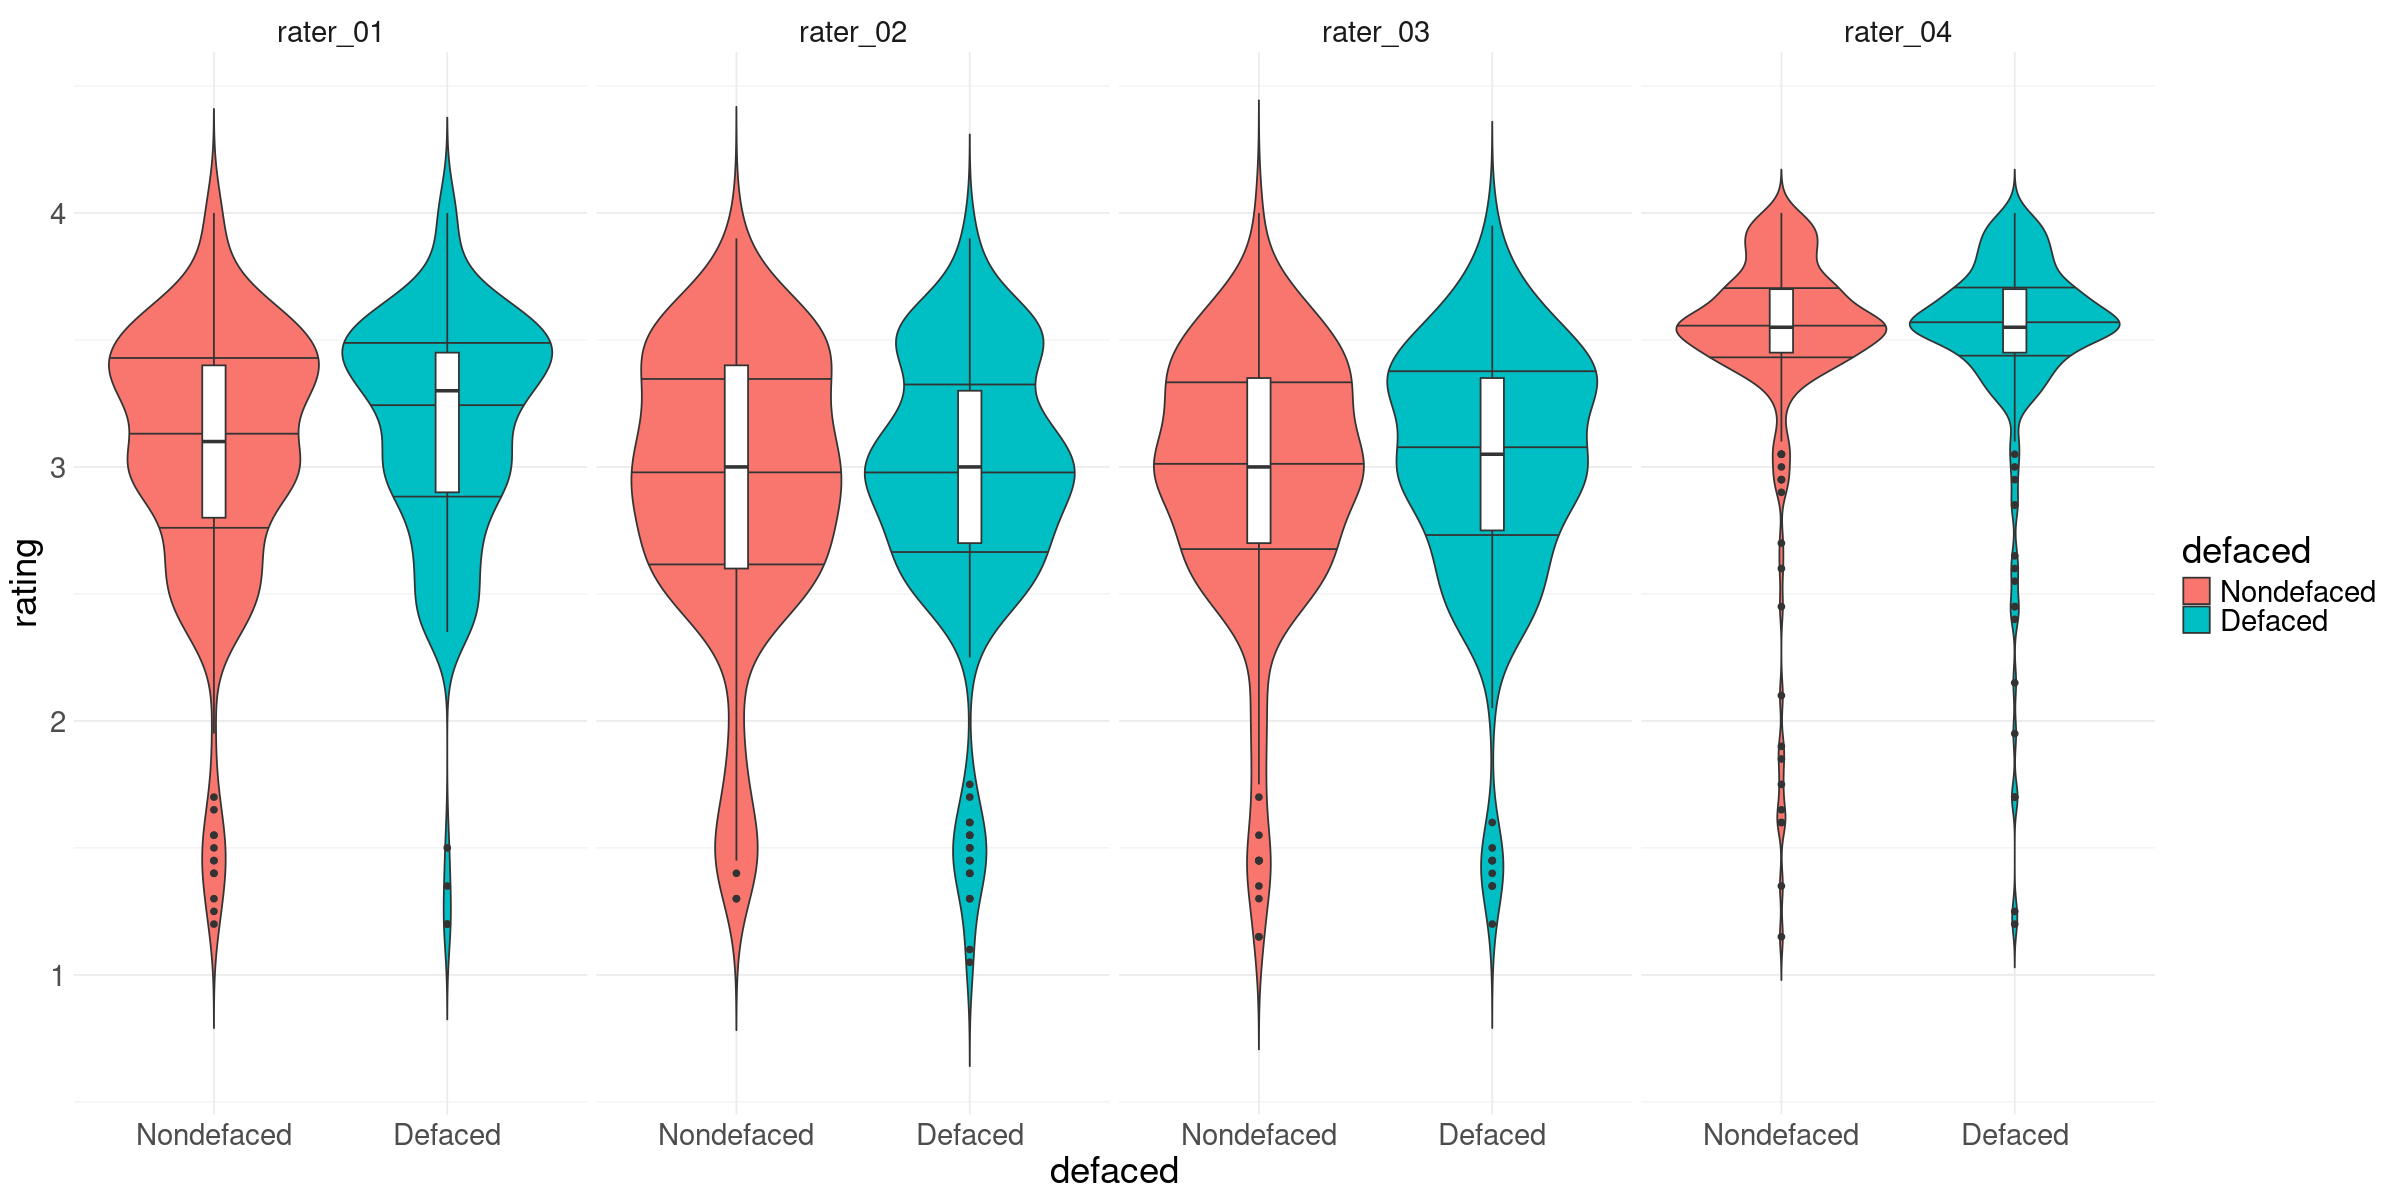

In [5]:
library(ggplot2)
#Increase plot size
options(repr.plot.width=20, repr.plot.height=10)

p <- ggplot(df, aes(x = defaced, y = rating, fill = defaced)) +
  geom_violin(data = subset(df, defaced == "Nondefaced"), trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  geom_violin(data = subset(df, defaced == "Defaced"), trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  geom_boxplot(width = 0.1, fill = "white") +  # Specify colors for alive categories
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  facet_wrap(~ rater_id, ncol = 4)

print(p)

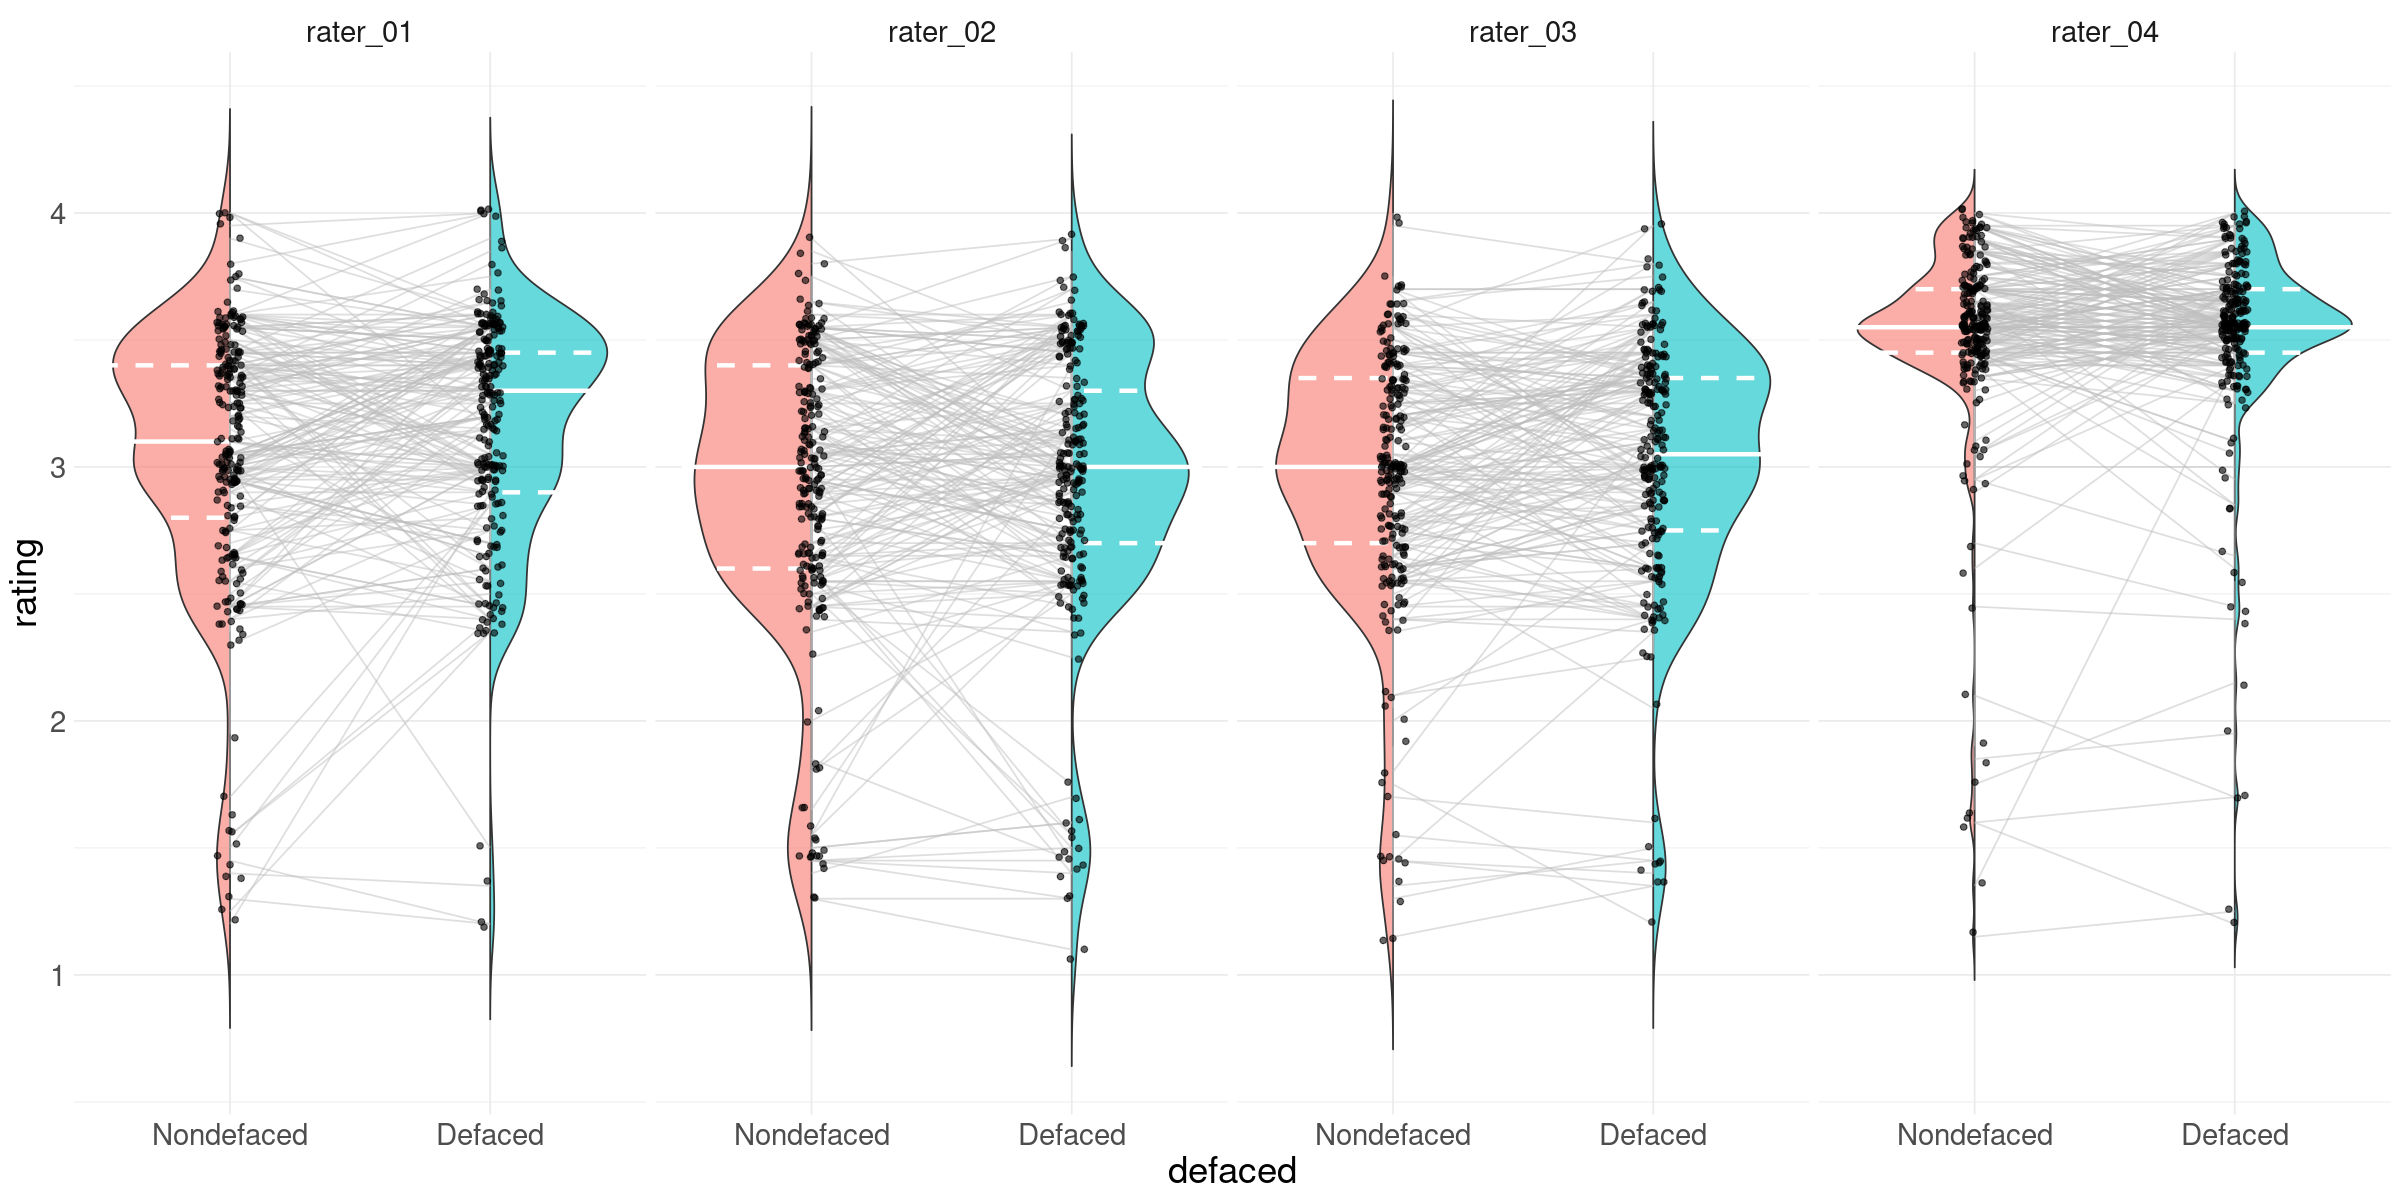

In [6]:
library(see)

p <- ggplot(df, aes(x = defaced, y = rating, group = defaced)) +
  geom_violinhalf(aes(fill = defaced), trim = FALSE, scale = "width", alpha = 0.6, flip=c(0,1)) +
  stat_summary(fun = quantile, fun.args = list(probs = c(0.5)), geom = "crossbar", width=1, color="white") +
  stat_summary(fun = quantile, fun.args = list(probs = c(0.25, 0.75)), geom = "crossbar", width=1, color="white", linetype="dashed") +
  geom_line(aes(group = subject), color = 'gray', alpha = 0.5) +
  geom_point(position = position_jitter(width = 0.05), alpha = 0.6) +
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  theme(legend.position = "none") +
  facet_wrap(~ rater_id, ncol = 4)
print(p)

It is interesting to see that different raters present a bias of different magnitude, our most expert rater is the one being most biased by the defacing process. It is also interesting to note that rater_04 was overall more optimistic about the images quality. 

# Intra-rater reliability
## Violin and line plot

In [7]:
# Identify duplicates as rows that share the same rater_id using dplyr, defaced condition and subject. Those are the 40 subjects that we presented twice in both conditions to assess the intra-rater variability.
df_intra <- df %>% group_by(rater_id, subject) %>% filter(n() > 2)

#Verify that 40 duplicated subjects are found
print(length(unique(df_intra$subject)))

#Add a column in the dataset encoding whether it is the first or the second time the image is presented to this rater 
df_intra$presentation <- ifelse(duplicated(df_intra[, c("subject", "rater_id", "defaced")]), "Second", "First")
df_intra

[1] 40

We visualize the evolution of ratings from defaced versus non-defaced images for each rater.

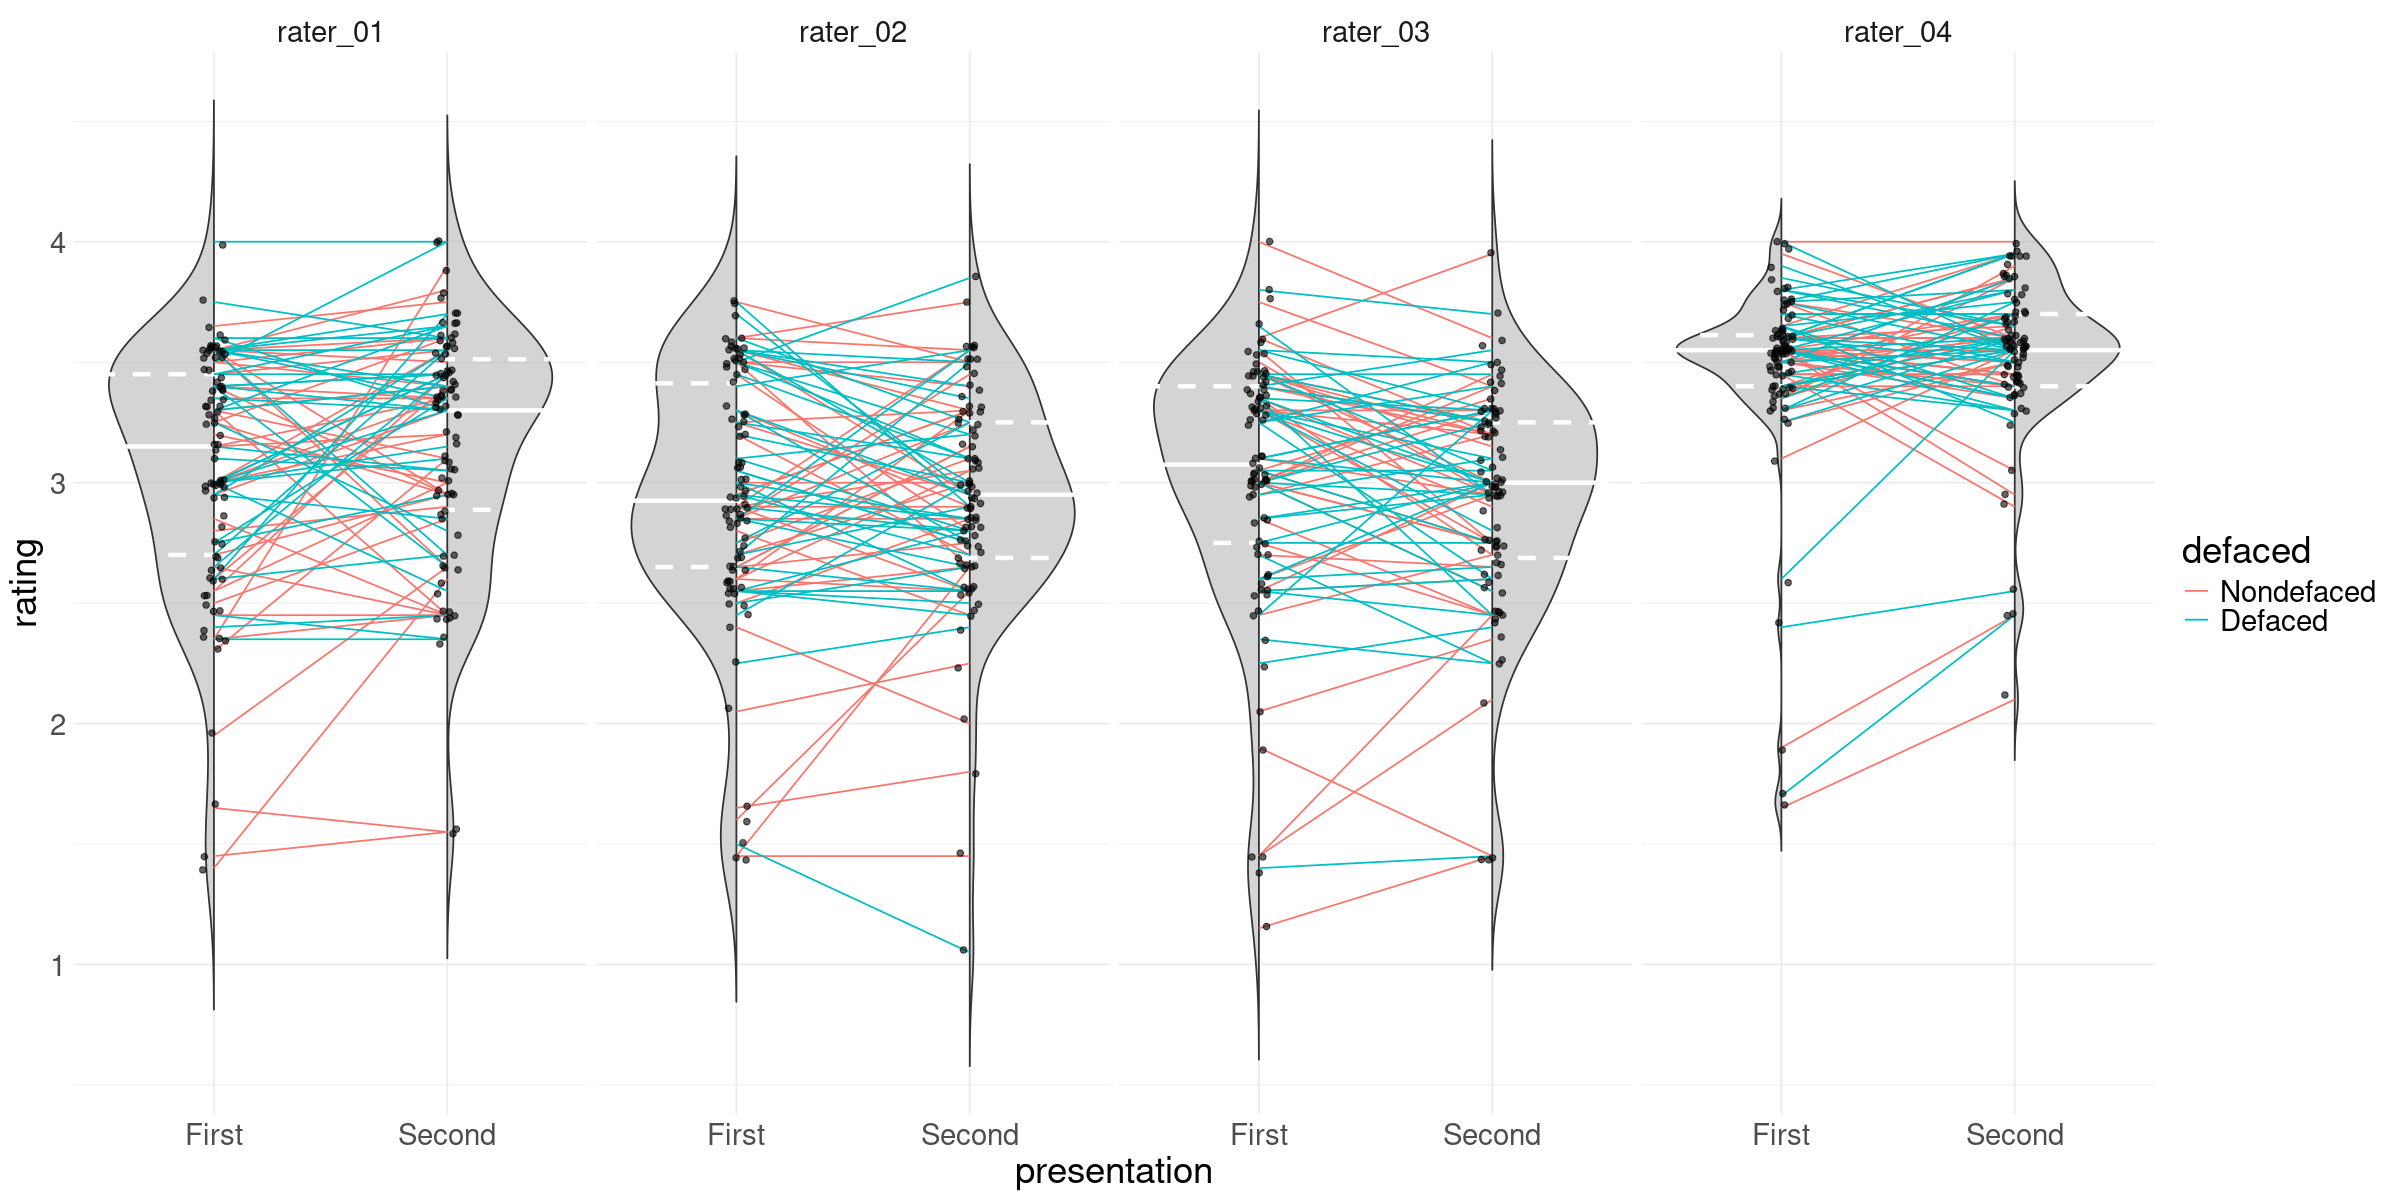

In [9]:
p <- ggplot(df_intra, aes(x = presentation, y = rating, group = presentation)) +
  geom_violinhalf(aes(fill = presentation), trim = FALSE, scale = "width", alpha = 0.5, flip=c(0,1), fill = "darkgrey") +
  stat_summary(fun = quantile, fun.args = list(probs = c(0.5)), geom = "crossbar", width=1, color="white") +
  stat_summary(fun = quantile, fun.args = list(probs = c(0.25, 0.75)), geom = "crossbar", width=1, color="white", linetype="dashed") +
  geom_line(aes(group = interaction(subject, defaced), color = defaced), alpha = 1) +
  geom_point(position = position_jitter(width = 0.05), alpha = 0.6) +
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  facet_wrap(~ rater_id, ncol = 4)
print(p)

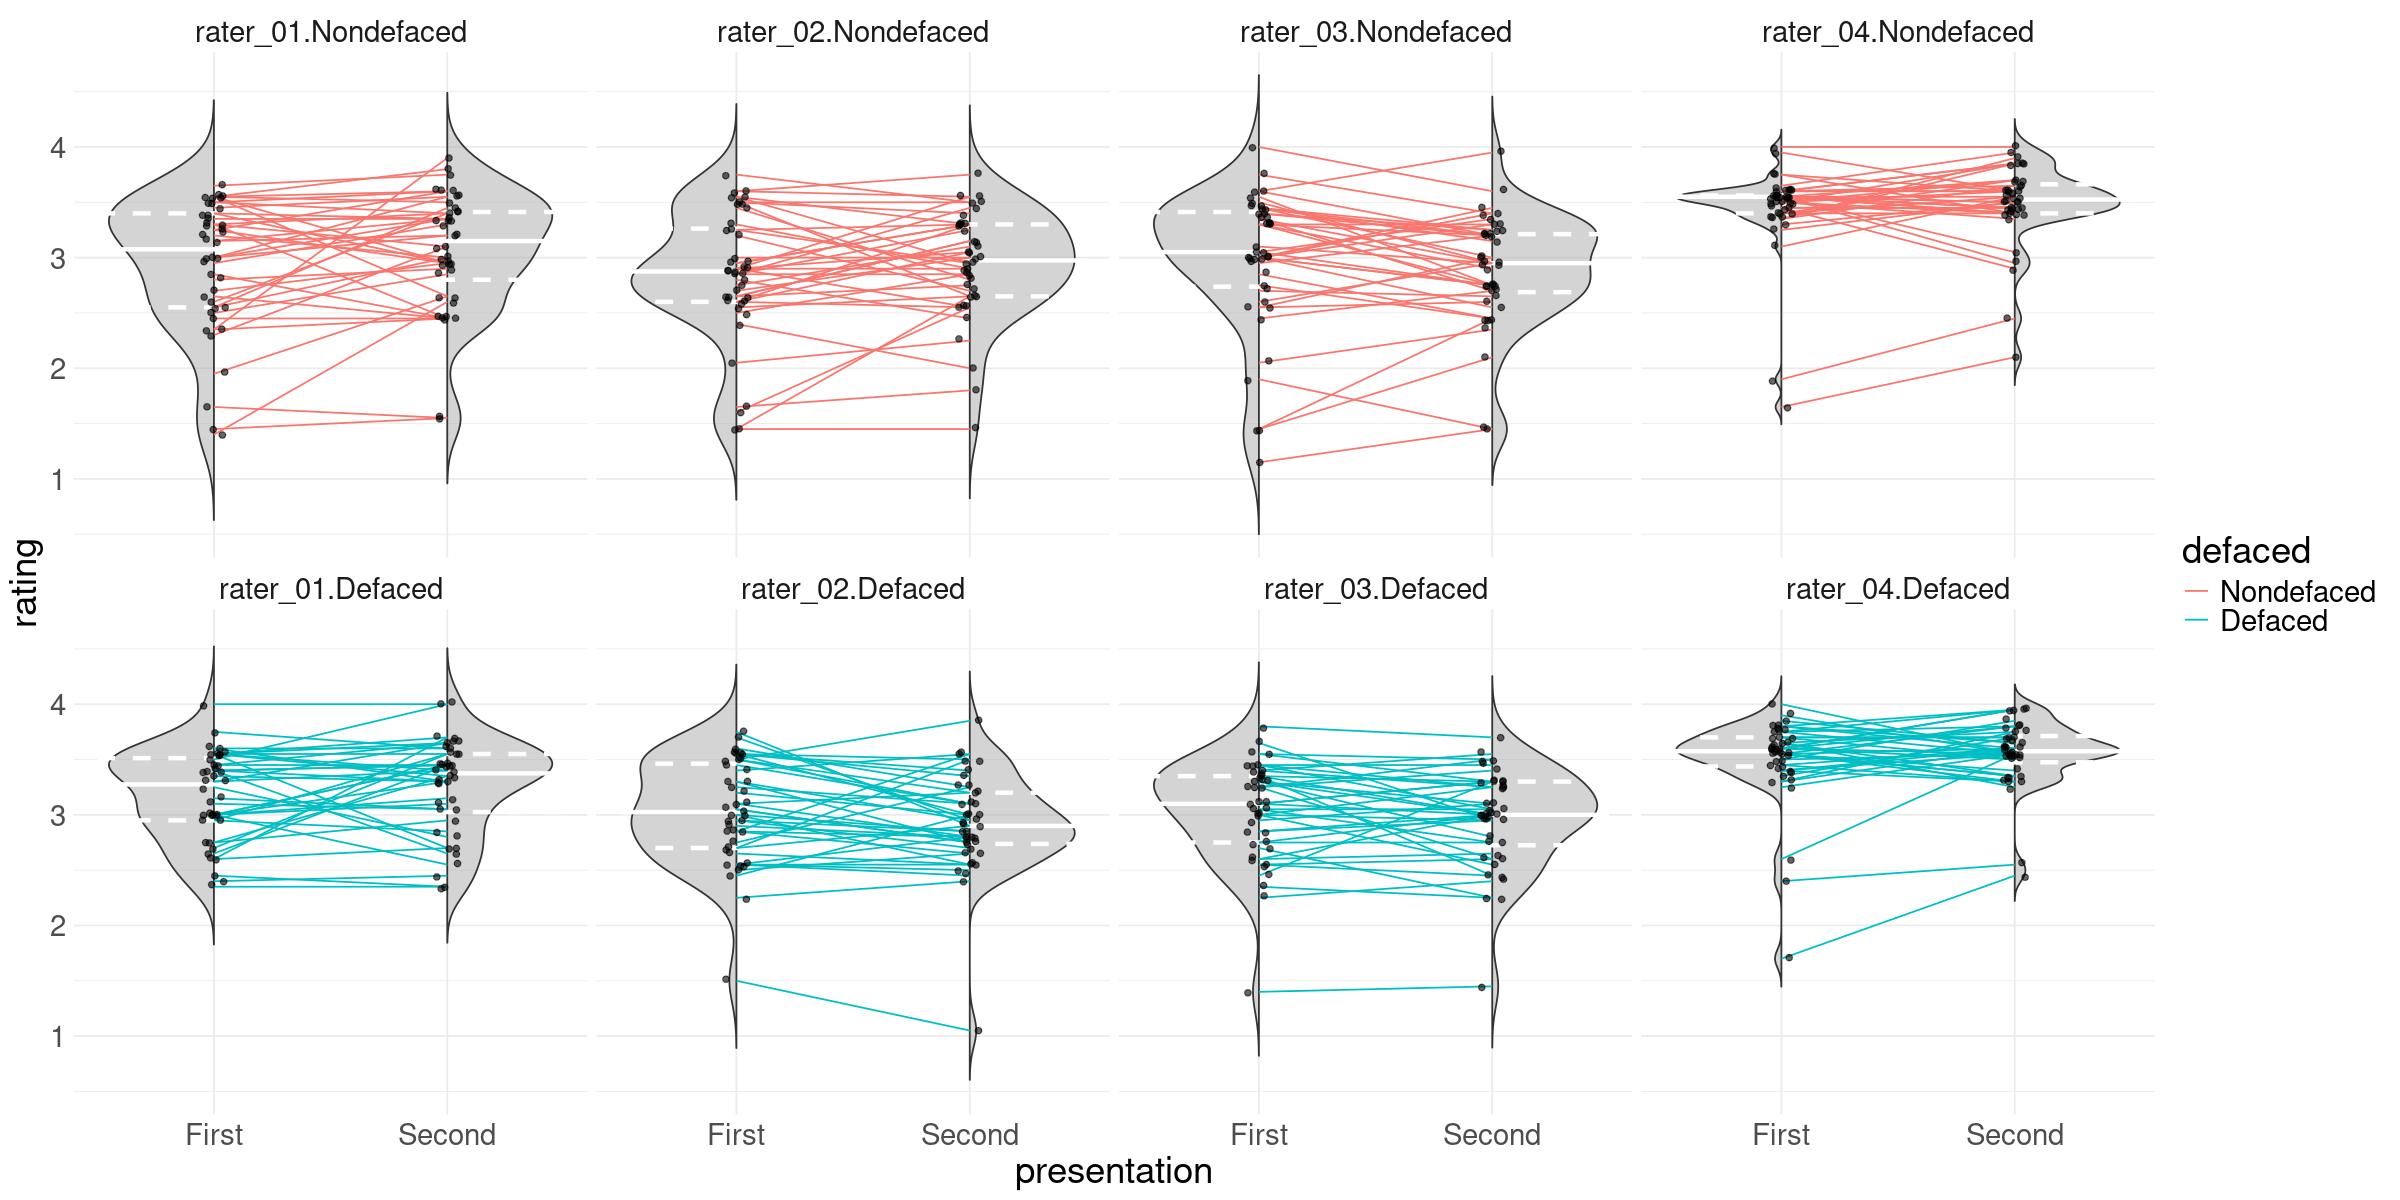

In [10]:
p <- ggplot(df_intra, aes(x = presentation, y = rating, group = presentation)) +
  geom_violinhalf(aes(fill = presentation), trim = FALSE, scale = "width", alpha = 0.5, flip=c(0,1), fill = "darkgrey") +
  stat_summary(fun = quantile, fun.args = list(probs = c(0.5)), geom = "crossbar", width=1, color="white") +
  stat_summary(fun = quantile, fun.args = list(probs = c(0.25, 0.75)), geom = "crossbar", width=1, color="white", linetype="dashed") +
  geom_line(aes(group = interaction(subject, defaced), color = defaced), alpha = 1) +
  geom_point(position = position_jitter(width = 0.05), alpha = 0.6) +
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  facet_wrap(~ interaction(rater_id, defaced), ncol = 4)
print(p)

## ICC

Let's quantify intra-rater reliability using intraclass correlation (ICC)

In [12]:
#To compute ICC, the data needs to be in wide format
library(tidyr)
df_intra$randomized_id <- NULL

df_intra_wide <- df_intra %>%
  pivot_wider(names_from = presentation, values_from = rating)

#Add a column that encodes the interaction between defaced and subject
df_intra_wide$image <- interaction(df_intra_wide$defaced, df_intra_wide$subject)
df_intra_wide$defaced <- NULL
df_intra_wide$subject <- NULL
df_intra_wide

rater_id,First,Second,image
<chr>,<dbl>,<dbl>,<fct>
rater_02,2.55,2.55,Defaced.72
rater_02,2.95,2.85,Defaced.248
rater_02,2.55,2.65,Nondefaced.437
rater_02,2.60,3.05,Nondefaced.614
rater_02,2.65,2.75,Nondefaced.525
rater_02,3.55,3.00,Defaced.335
rater_02,2.85,3.45,Nondefaced.92
rater_02,3.55,3.40,Defaced.385
rater_03,3.55,3.30,Defaced.72


In [34]:
# Compute ICC two way mixed effects model and consider absolute agreement
library("irr")

df_intra_wide$image <- NULL

#extract list of unique value in df$rater_id
for (rater in unique(df$rater_id)) {
  #Keep only the rows corresponding to the rater
  df_rater <- subset(df_intra_wide, rater_id == rater)
  df_rater$rater_id <- NULL

  print(sprintf('Intra-rater reliability for %s', rater))
  print(icc(df_rater, model="twoway", type="agreement"))
}


[1] "Intra-rater reliability for rater_02"
 Single Score Intraclass Correlation

   Model: twoway 
   Type : agreement 

   Subjects = 80 
     Raters = 2 
   ICC(A,1) = 0.676

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(79,79.1) = 5.12 , p = 2.85e-12 

 95%-Confidence Interval for ICC Population Values:
  0.536 < ICC < 0.779
[1] "Intra-rater reliability for rater_03"
 Single Score Intraclass Correlation

   Model: twoway 
   Type : agreement 

   Subjects = 80 
     Raters = 2 
   ICC(A,1) = 0.746

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(79,75.6) = 7.09 , p = 8.37e-16 

 95%-Confidence Interval for ICC Population Values:
  0.63 < ICC < 0.83
[1] "Intra-rater reliability for rater_01"
 Single Score Intraclass Correlation

   Model: twoway 
   Type : agreement 

   Subjects = 80 
     Raters = 2 
   ICC(A,1) = 0.609

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(79,72.5) = 4.29 , p = 9.88e-10 

 95%-Confidence Interval for ICC Population Values:
  0.449 < ICC < 0.731
[1] "Intra-rater reliability for rater_